In [2]:
import pandas as pd
import numpy as np
import time

import cv2
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = r'C:\Users\cvenkatanagasatya\Pictures\Open CV\Computer-Vision-with-Python\DATA'

In [2]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

In [22]:
cap.get(cv2.CAP_PROP_FRAME_COUNT)

-1.0

In [5]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    writer.write(frame)
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) & 0xFF== ord('q'):
        break
        
cap.release()
writer.release()
cv2.destroyAllWindows()

In [4]:
writer = cv2.VideoWriter("my_video.mp4", cv2.VideoWriter_fourcc(*'DIVX'),30, (width, height)) #codec DIVX

In [7]:
cap = cv2.VideoCapture('my_video.mp4')

if cap.isOpened() == False:
    print("File not found")
    
    
while cap.isOpened():
    ret, frame = cap.read()
    
    if ret == True:
        cv2.imshow("frame", frame)
        
        if cv2.waitKey(2) & 0xFF==2:
            break
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

In [10]:
#delayed time frame


cap = cv2.VideoCapture('my_video.mp4')

if cap.isOpened() == False:
    print("File not found")
    
    
while cap.isOpened():
    ret, frame = cap.read()
    
    if ret == True:
        time.sleep(1/20)
        cv2.imshow("frame", frame)
        
        if cv2.waitKey(2) & 0xFF==2:
            break
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

## Drawing on video

In [12]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Top left corner
x = width // 2
y = height // 2

#width and height of rectangle
# bottom right corner
w = width // 4
h = height //4


while True:
    ret, frame = cap.read()
    
    cv2.rectangle(frame, (x,y), (x+w, y+h), color=(0,255,0), thickness=3)
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) & 0xFF== ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

## drawing on image using cursor

In [1]:


#callback function

def draw_rect(event, x, y, flags, params):
    global pt1, pt2, top_left_click, bottom_right_click
    
    if event == cv2.EVENT_LBUTTONDOWN:
        
        #reset rect
        if top_left_click == True and bottom_right_click == True:
            pt1 = (x,y)
            pt2 = (0,0)
            top_left_click = False
            bottom_right_click = False
            
            
        if top_left_click == False:
            pt1 = (x,y)
            top_left_click = True
            
        elif bottom_right_click == False:
            pt2=(x,y)
            bottom_right_click = True
            

#global variables
pt1 = (0,0)
pt2 = (0,0)

top_left_click = False
bottom_right_click = False


#connect to callback
cap = cv2.VideoCapture(0)

cv2.namedWindow('test')
cv2.setMouseCallback('test', draw_rect)




while True:
    ret, frame = cap.read()
    
    if top_left_click:
        cv2.circle(frame, center=pt1, radius=5, color=(0,0,255), thickness=-1)
    
    if top_left_click and bottom_right_click:
        cv2.rectangle(frame,pt1,pt2,(0,0,255),3)    
        
        
    
    cv2.imshow('test', frame)
    
    if cv2.waitKey(1) & 0xFF== ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

## Draw circle

In [4]:
import pandas as pd
import numpy as np
import time

import cv2
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline


def draw_circle(event, x,y, flags, params):
    global click, pt1
    
    if event == cv2.EVENT_LBUTTONDOWN:
        
        if click == True:
            pt1=(x,y)
            click=False
        
        if click==False:
            pt1 = (x,y)
            click=True
    

pt1 = (0,0)
click = False

cv2.namedWindow("frame")
cv2.setMouseCallback("frame", draw_circle)

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    
    if click:
        cv2.circle(frame, center=pt1, radius=15, color=(0,0,255), thickness=3)
        
    
    cv2.imshow("frame", frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()      
cv2.destroyAllWindows()

## Object Detection

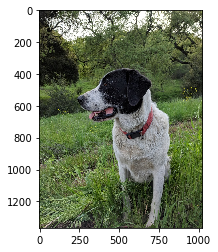

In [3]:
full = cv2.imread(dir+'\sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

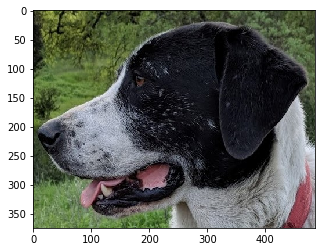

In [21]:
face = cv2.imread(dir+'\sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [22]:
face.shape

(375, 486, 3)

In [14]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [19]:
res = cv2.matchTemplate(full_copy, face, cv2.TM_CCOEFF)
min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    

In [24]:
min_loc, max_loc, 231+375, 486+345

((0, 10), (231, 345), 606, 831)

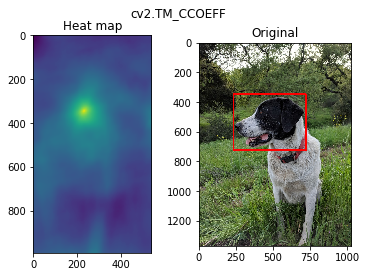

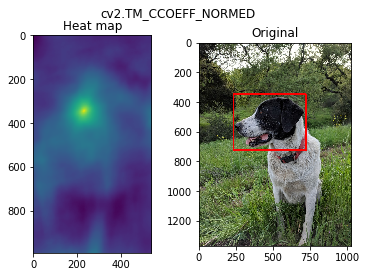

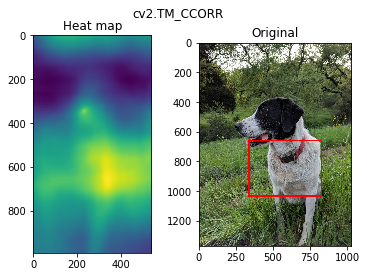

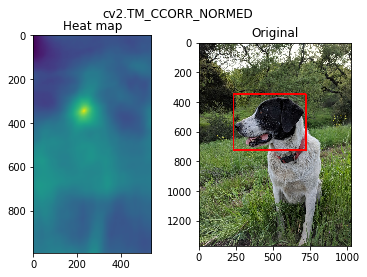

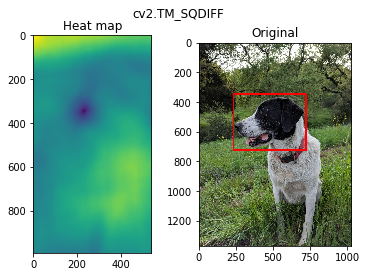

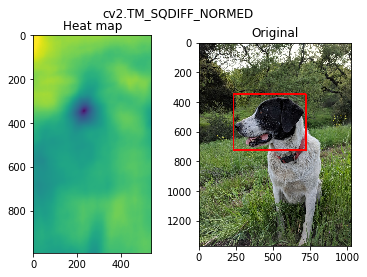

In [13]:
for m in methods:
    full_copy = full.copy()
    method = eval(m)
    
    #template matching
    res = cv2.matchTemplate(full_copy, face, method)
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    #rectangle
    height, width, channels = face.shape
    bottom_right = (top_left[0]+width,top_left[1]+height)
    cv2.rectangle(full_copy, top_left, bottom_right,(255,0,0), thickness=10)
    
    #plot images
    plt.subplot(121)
    plt.imshow(res)
    plt.title("Heat map")
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title("Original")
    plt.suptitle(m)
    plt.show()

## corner detection

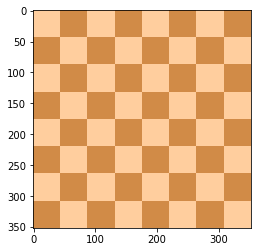

In [33]:
flat_chess = cv2.imread(r'C:\Users\cvenkatanagasatya\Pictures\Open CV\Computer-Vision-with-Python\DATA\flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

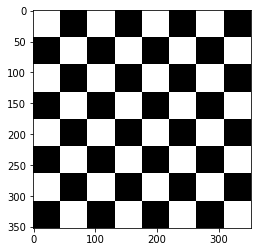

In [34]:
gray_flatchess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flatchess, cmap='gray')

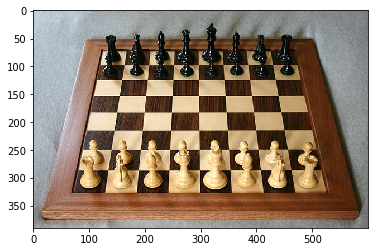

In [57]:
real_chess = cv2.imread(data+'\\real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

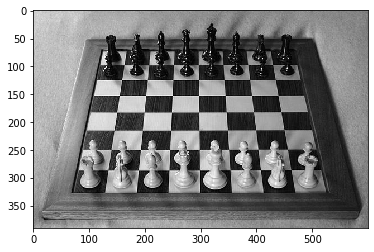

In [59]:
gray_realchess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_realchess, cmap='gray')

In [61]:
# Harris-corner detection
#require float values

gray = np.float32(gray_flatchess)

In [71]:
dst = cv2.cornerHarris(src=gray,blockSize=2, ksize=3, k=0.04)

In [65]:
dst = cv2.dilate(dst,None)

In [69]:
flat_chess[dst>0.01*dst.max()] = (255,0,0)

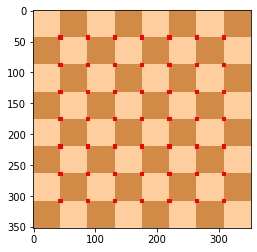

In [70]:
plt.imshow(flat_chess)

In [80]:
#SHI-Tomashi
corners = cv2.goodFeaturesToTrack(gray_flatchess,10,0.01,10)

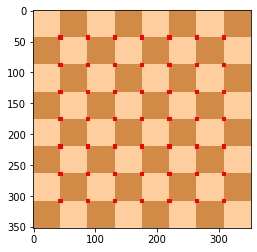

In [81]:
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess, (x,y),3, (255,0,0), -1)
plt.imshow(flat_chess)

In [86]:
#SHI-Tomashi
corners = cv2.goodFeaturesToTrack(gray_realchess,200,0.01,10)

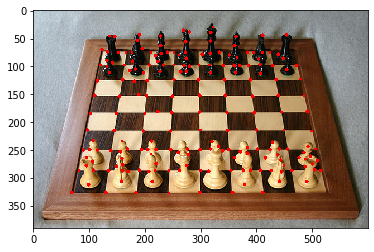

In [90]:
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess, (x,y),3, (255,0,0), -1)
plt.imshow(real_chess)

In [ ]:
# Edge Detection
#Canny Edge detection

1) Apply gausian filter to smooth of the image
2) Find intensity gradients in the image
3) Apply non-maximum supression to get rid of spurious response
4) Apply double threshold to determine potential edges
5) Track edge by hysteresis

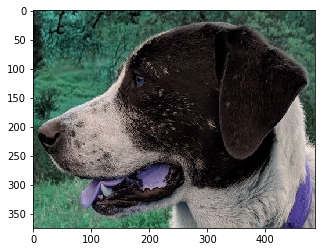

In [91]:
img = cv2.imread(data+'\\sammy_face.jpg')
plt.imshow(img)

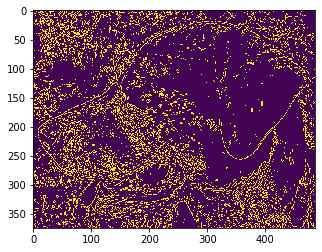

In [92]:
edges = cv2.Canny(image=img,threshold1=127,threshold2=127)
plt.imshow(edges)

In [93]:
med_valu = np.median(img)
med_valu

64.0

In [96]:
lower = int(max(0,0.7*med_valu)) #70% of median value
upper = int(min(255, 1.3*med_valu)) #30% above median or 255

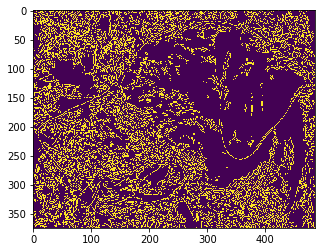

In [98]:
edges = cv2.Canny(image=img,threshold1=lower,threshold2=upper+100)
plt.imshow(edges)

In [114]:
blur = cv2.blur(img,ksize=(5,5))

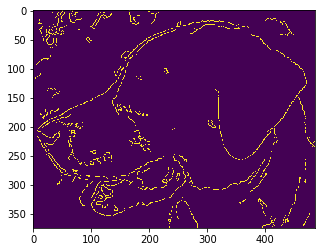

In [116]:
edges = cv2.Canny(image=blur,threshold1=lower,threshold2=upper+80)
plt.imshow(edges)

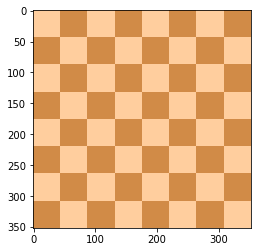

In [117]:
# Grid detection
#Track objects

flat_chess = cv2.imread(r'C:\Users\cvenkatanagasatya\Pictures\Open CV\Computer-Vision-with-Python\DATA\flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

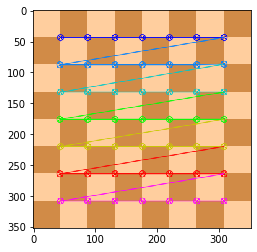

In [120]:
found, corners = cv2.findChessboardCorners(flat_chess, (7,7))
plt.imshow(cv2.drawChessboardCorners(flat_chess, (7,7), corners, found))

In [ ]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    
    if click:
        cv2.circle(frame, center=pt1, radius=15, color=(0,0,255), thickness=3)
        
    
    cv2.imshow("frame", frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()      
cv2.destroyAllWindows()

In [1]:
# Practice

import pandas as pd
import numpy as np
import time

import cv2
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    
    #med_val = np.median(frame)
    #print(med)
    #lower = int(max(0,0.7*med_val)) #70% of median value
    #upper = int(min(255, 1.3*med_val))
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.blur(gray, (5,5))

    gray_edges = cv2.Canny(gray,80,100) 
    color_edges = cv2.Canny(frame, 80,100)

    images = np.hstack((gray_edges, color_edges))
    cv2.imshow("frame", images)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

## Contours

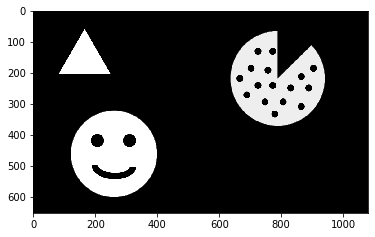

In [27]:
# Shape analysis, object detection and recognition
img = cv2.imread(data+"\\internal_external.png",0)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img, cmap='gray')

In [28]:
contours, hierarchy = cv2.findContours(img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [29]:
type(contours), type(hierarchy)

(list, numpy.ndarray)

In [32]:
external_contours = np.zeros(img.shape)

In [34]:
external_contours.shape

(652, 1080)

In [43]:
#-1 is external contour,

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1: 
        cv2.drawContours(external_contours,contours,i,255,-1)

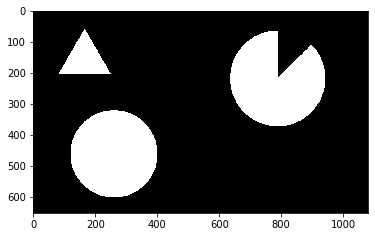

In [44]:
plt.imshow(external_contours, cmap='gray')

In [48]:
#internal
#-1 is external contour,

internal_contour = np.zeros(img.shape)
for i in range(len(contours)):
    if hierarchy[0][i][3] != -1: 
        cv2.drawContours(internal_contour,contours,i,255,-1)

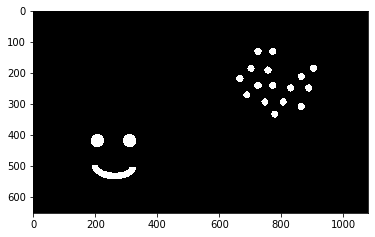

In [49]:
plt.imshow(internal_contour, cmap='gray')

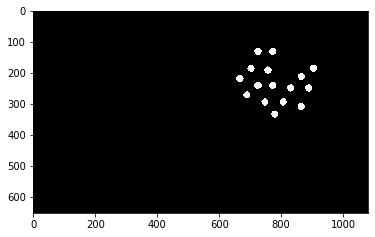

In [52]:
#internal
#-1 is external contour,

internal_contour = np.zeros(img.shape)
for i in range(len(contours)):
    if hierarchy[0][i][3] == 4: 
        cv2.drawContours(internal_contour,contours,i,255,-1)
        
plt.imshow(internal_contour, cmap='gray')

## Feature Matching 

In [4]:
def show_image(img):
    fig = plt.figure(figsize=(15,8))
    #ax = fig.add_subplot(111)
    plt.imshow(img, cmap='gray')

In [6]:
reeses = cv2.imread(data+'\\reeses_puffs.png',0)

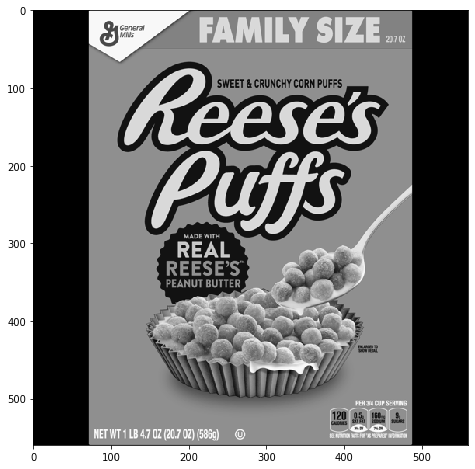

In [60]:
show_image(reeses)

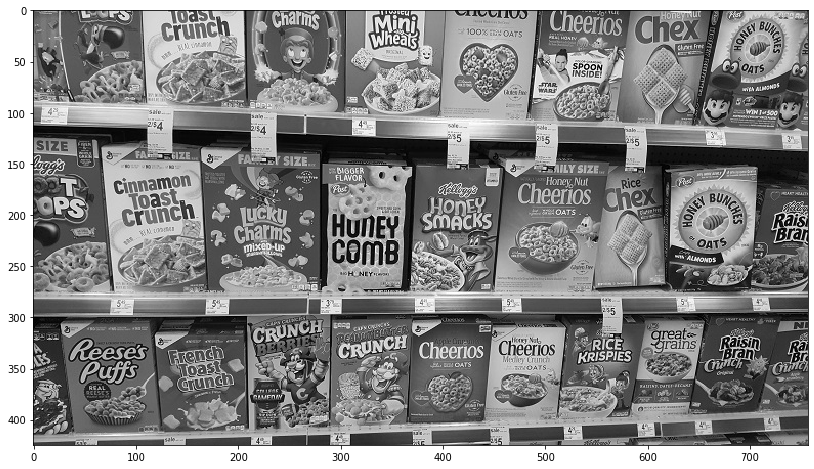

In [7]:
cereals = cv2.imread(data+'\many_cereals.jpg', 0)
show_image(cereals)

In [64]:
#Brute-force detection with ORB descriptors
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)

In [65]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [66]:
matches = bf.match(des1, des2)

In [69]:
#sort using distances
#less distance is better match
matches = sorted(matches, key=lambda x:x.distance)

In [71]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:20],None, flags=2)

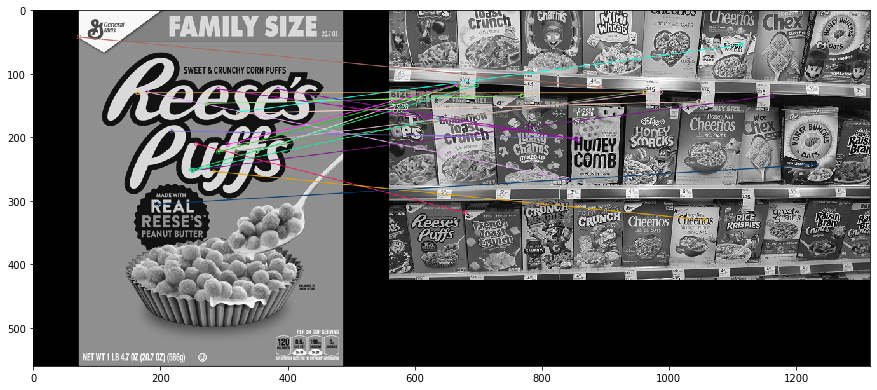

In [75]:
show_image(reeses_matches)

In [3]:
# SIFT - Scal and Variant Transform
#for images of various scales

sift = cv2.xfeatures2d.SIFT_create()

In [8]:
kp1,ds1 = sift.detectAndCompute(reeses, None)
kp2,ds2 = sift.detectAndCompute(cereals, None)

In [10]:
bf = cv2.BFMatcher()

In [28]:
matcher = bf.knnMatch(ds1, ds2, k=2)

In [29]:
#ratio test
#less distance is better
good = []

for match1, match2 in matcher:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

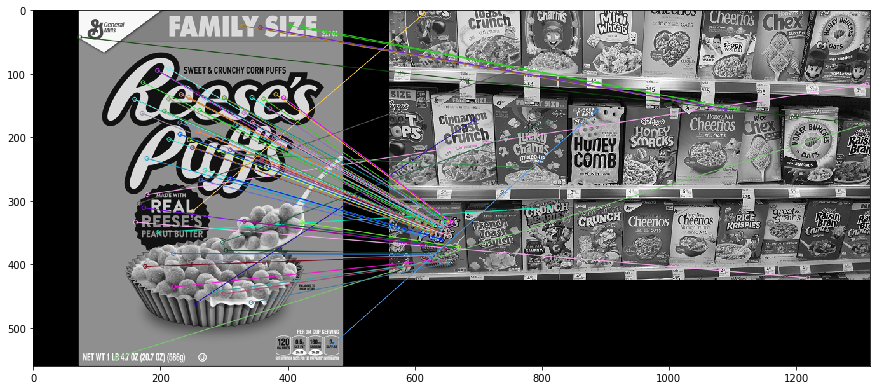

In [30]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good,None, flags=2)
show_image(sift_matches)

In [8]:
# FLANN = Flat Library for Approximate Near Neighbors
sift = cv2.xfeatures2d.SIFT_create()
kp1,ds1 = sift.detectAndCompute(reeses, None)
kp2,ds2 = sift.detectAndCompute(cereals, None)

In [9]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [10]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [11]:
matches = flann.knnMatch(ds1, ds2,k=2)

In [12]:
#ratio test
good = []

for match1,match2 in matches:
    if match1.distance < 0.70*match2.distance:
        good.append([match1])

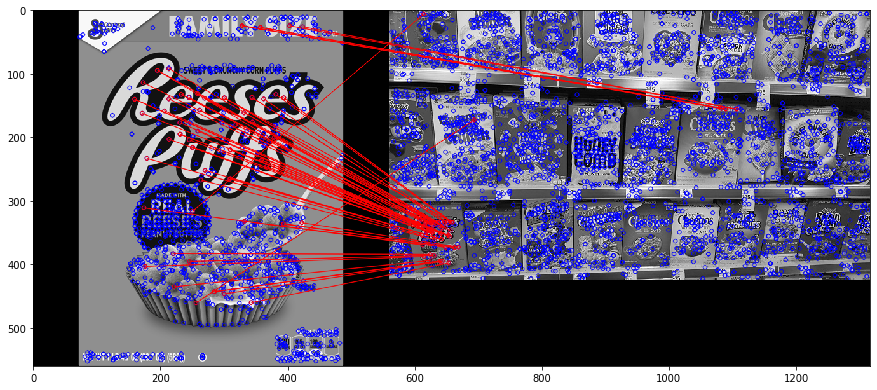

In [37]:
colors = dict(matchColor=(255,0,0), singlePointColor=(0,0,255))
show_image(cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,**colors))

In [15]:
matchesMask = [[0,0] for i in range(len(matches))]

In [27]:
#matchesMask

#ratio test

for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.70*match2.distance:
        matchesMask[i] = [1,0]

In [28]:
draw_params = dict(matchColor=(0,255,0),
                  singlePointColor=(255,0,0),
                   matchesMask = matchesMask,
                   flags=0)

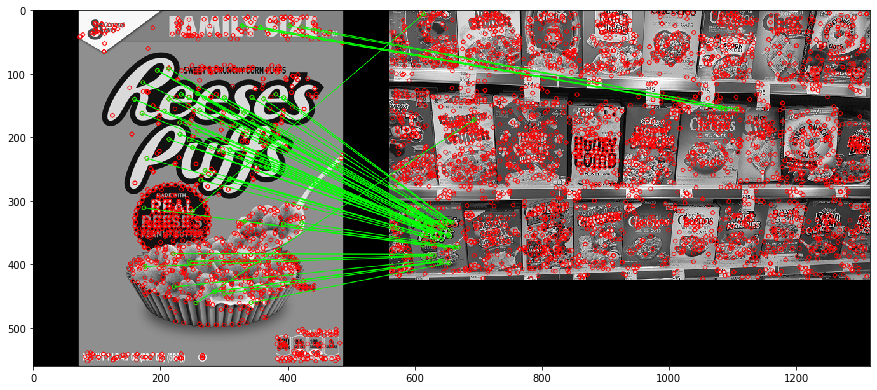

In [29]:
show_image(cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params))

## Image segmentation

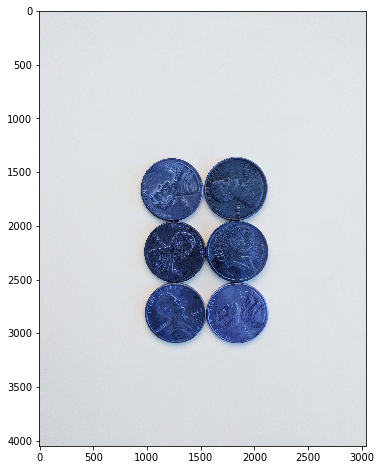

In [5]:
## Watershed algorithm (without)
sep_coins = cv2.imread(data+'\pennies.jpg')
show_image(sep_coins)

In [ ]:
## Watershed algorithm (without)
sep_coins = cv2.imread(data+'\pennies.jpg')


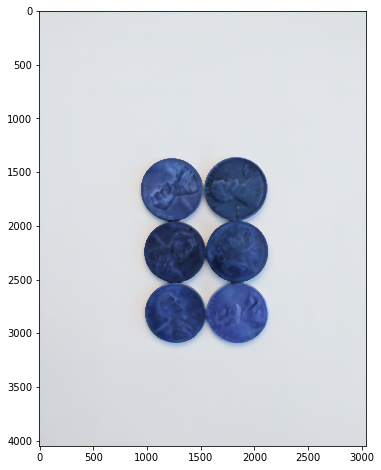

In [13]:
#median blur - removes faces and unnecessary noise
#gray scale
# binary threshold - black and white to find contours

sep_blur = cv2.medianBlur(sep_coins,25)
show_image(sep_blur)

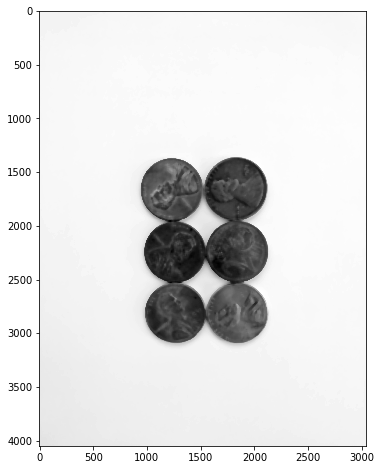

In [16]:
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)
show_image(gray_sep_coins)


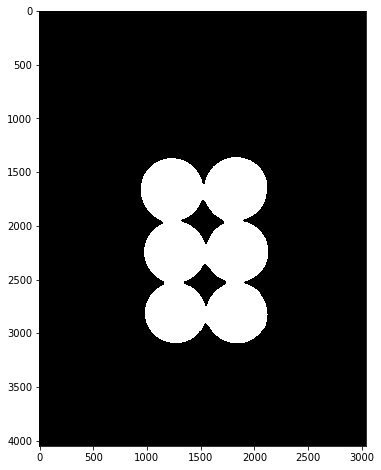

In [21]:
ret, sep_thresh = cv2.threshold(gray_sep_coins, 160,255, cv2.THRESH_BINARY_INV)
show_image(sep_thresh)

In [22]:
contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [23]:
contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

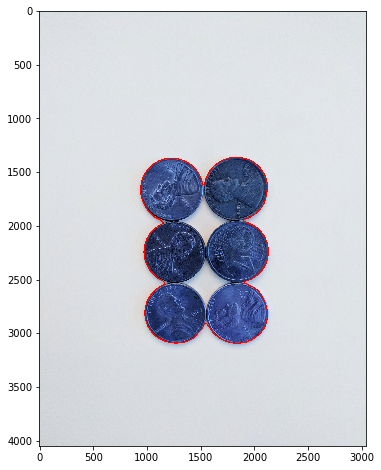

In [24]:
show_image(sep_coins)

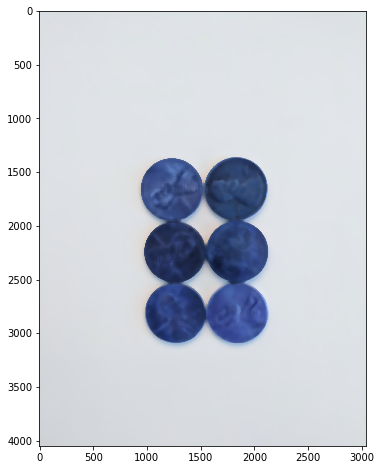

In [34]:
#WaterShed algoritm
img = cv2.imread(data+'\pennies.jpg')
img = cv2.medianBlur(img, 41)
show_image(img)

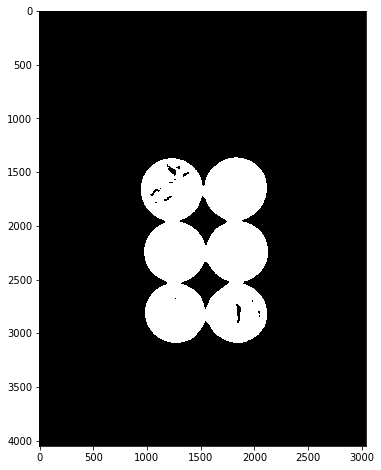

In [30]:
gray = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127,255, cv2.THRESH_BINARY_INV)
show_image(thresh)

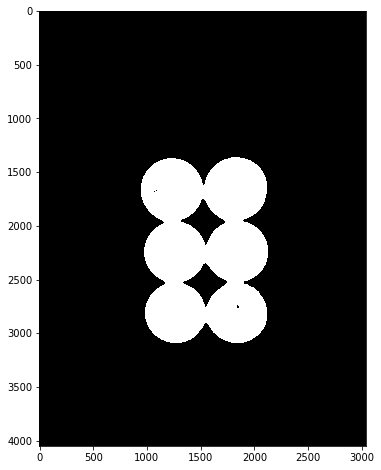

In [35]:
#Otsu's method is a variant of thersholding 
#works well with watershed

ret, thresh = cv2.threshold(gray, 0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
show_image(thresh)

In [40]:
#Noise removal
kernel = np.ones((5,5),np.uint8)

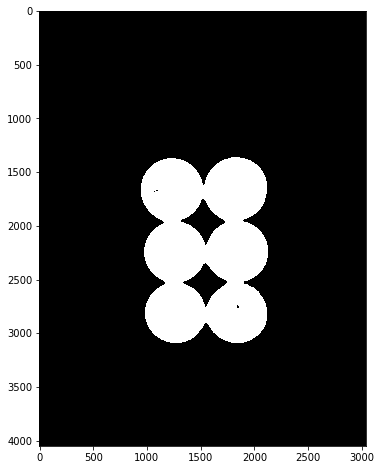

In [45]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=5)

show_image(opening)

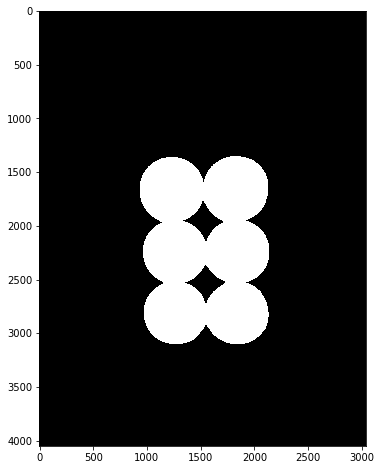

In [49]:
sure_bg = cv2.dilate(opening, kernel, iterations=5)
show_image(sure_bg)

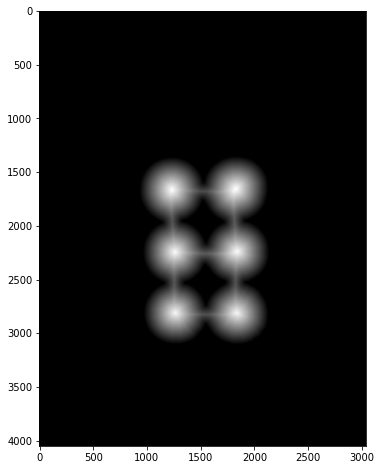

In [51]:
#Distance Transform - differentiates b/w background and foreground
# center of the image will be bright and the farther ones fade away.

dist_transform = cv2.distanceTransform(sure_bg, cv2.DIST_L2, 5)
show_image(dist_transform)

In [56]:
ret, sure_foreground = cv2.threshold(dist_transform, 0.7*dist_transform.max(),255,0)

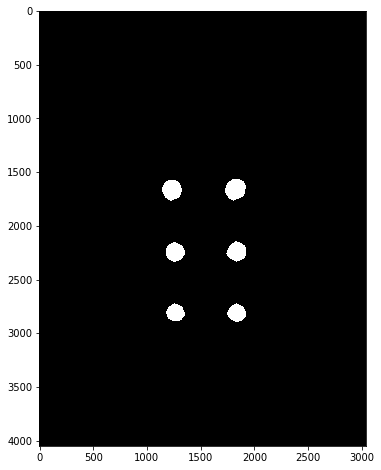

In [57]:
show_image(sure_foreground)

In [59]:
# find the unknow region - diff b/w sure_bg and sure_fg
sure_fg = np.uint8(sure_foreground)
sure_fg

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

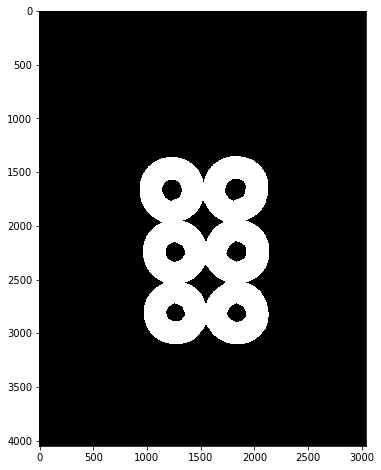

In [60]:
unknown = cv2.subtract(sure_bg, sure_fg)
show_image(unknown)

In [64]:
# create label markers for watershed
ret, markers = cv2.connectedComponents(sure_fg)

In [66]:
markers = markers+1

In [68]:
markers[unknown==255] = 0

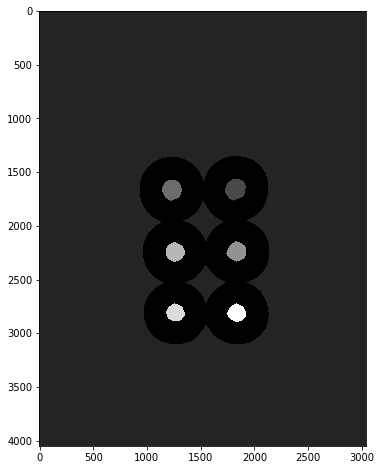

In [70]:
show_image(markers)

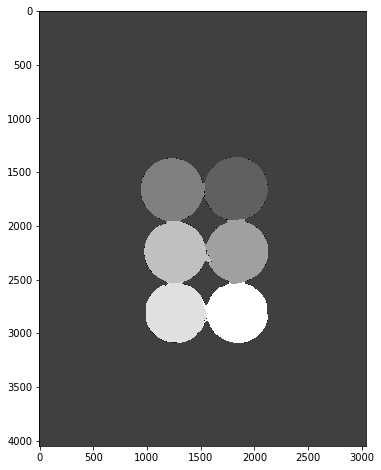

In [71]:
markers = cv2.watershed(img, markers)
show_image(markers)

In [72]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

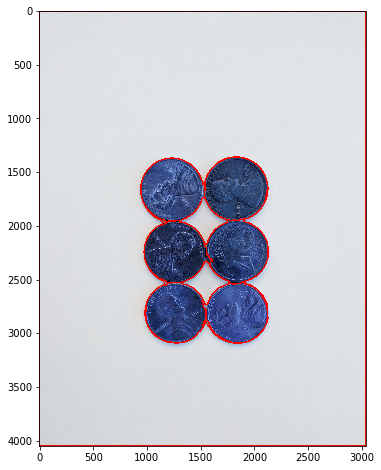

In [73]:
show_image(sep_coins)

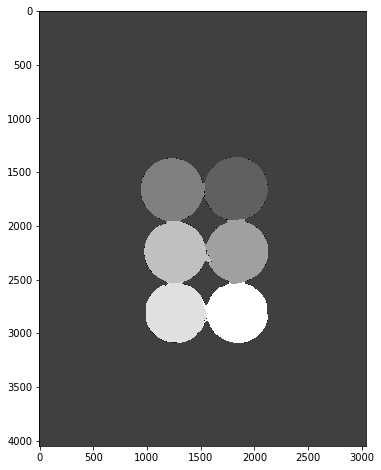

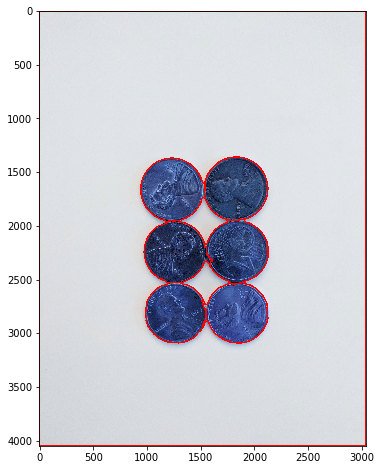

In [75]:
#complete steps

sep_coins = cv2.imread(data+'\pennies.jpg')
sep_blur = cv2.medianBlur(sep_coins,25)
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


#find background
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=5)
sure_bg = cv2.dilate(opening, kernel, iterations=5)

#find foreground
dist_transform = cv2.distanceTransform(sure_bg, cv2.DIST_L2, 5)
ret, sure_foreground = cv2.threshold(dist_transform, 0.7*dist_transform.max(),255,0)

#finding unknown
sure_fg = np.uint8(sure_foreground)
unknown = cv2.subtract(sure_bg, sure_fg)


#label markers
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0

#watershed
markers = cv2.watershed(img, markers)
show_image(markers)


#proof
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)
show_image(sep_coins)

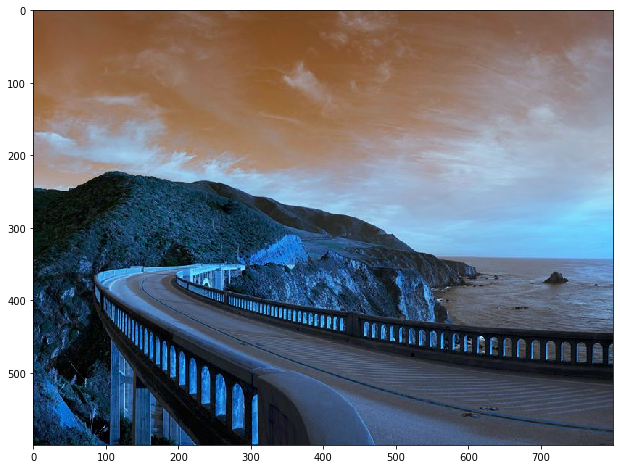

In [77]:
#Custom seeds with watershed
road = cv2.imread(data+"\\road_image.jpg")
road_copy = road.copy()
show_image(road)

In [78]:
road.shape

(600, 800, 3)

In [88]:
marker_image = np.zeros(road.shape[:2], dtype=np.int32)
segments = np.zeros(road.shape, dtype=np.uint8)

In [81]:
from matplotlib import cm
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [86]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [93]:
colors = []
for i in range(10):
    colors.append(create_rgb(i))
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [92]:
## global
n_markers=10
current_marker = 1
marks_updated = False

## callback
def mouse_callback(event, x,y, flags, param):
    global marks_updated
    
    if event == cv2.EVENT_LBUTTONDOWN:
        #markers for watershed algorithm
        cv2.circle(marker_image, (x,y), 10, (current_marker), -1)
        
        #for user
        cv2.circle(road_copy, (x,y), 10, colors[current_marker], -1)
        
        marks_updated =True

cv2.namedWindow("road_image")
cv2.setMouseCallback("road_image", mouse_callback)
##image

while True:
    cv2.imshow('watershed', segments)
    cv2.imshow('road_image', road_copy)
    
    k = cv2.waitKey(2)
    
    if k==27:
        break
        
    #clearing all colors    
    elif k==ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[:2], dtype=np.int32)
        segments = np.zeros(road.shape, dtype=np.uint8)
    
    #update color
    elif k>0 and chr(k).isdigit():
        current_marker = int(chr(k))
        
    #update marking
    if marks_updated:
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        
        segments = np.zeros(road.shape, dtype=np.uint8)
        for color_ind in range(n_markers):
            segments[marker_image_copy==color_ind] = colors[color_ind]
        
cv2.destroyAllWindows()        

## Face Detection

In [94]:
# Haar cascades - viola jone framework
#Feature type:
1) Edge features
2) Line features
3) Four rectangle features


In [117]:
nadia = cv2.imread(data+"\\Nadia_Murad.jpg", 0)
denis = cv2.imread(data+"\\Denis_Mukwege.jpg", 0)
solvay = cv2.imread(data+"\\solvay_conference.jpg")

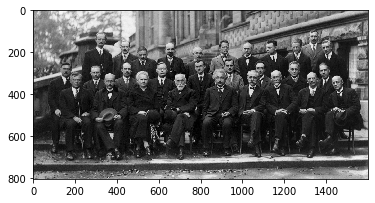

In [99]:
plt.imshow(solvay, cmap='gray')

In [3]:
face_cascade = cv2.CascadeClassifier(r'C:\Users\cvenkatanagasatya\Pictures\Open CV\Computer-Vision-with-Python\DATA\haarcascades\haarcascade_frontalface_default.xml')

In [6]:
def detect_face(img):
    face_img = img.copy()
    face_rect = face_cascade.detectMultiScale(face_img)
    for (x,y,w,h) in face_rect:
        cv2.rectangle(face_img,(x,y),(x+w,y+h), (0,255,0), 5)
    return face_img

In [104]:
result = detect_face(denis)

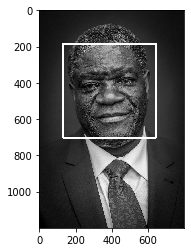

In [106]:
plt.imshow(result, cmap='gray')

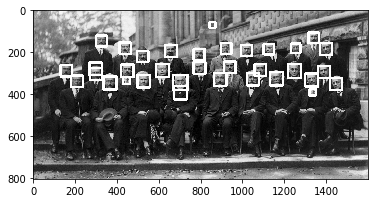

In [109]:
plt.imshow(detect_face(solvay), cmap='gray')

In [5]:
def adj_detect_face(img):
    face_img = img.copy()
    face_rect = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=3)
    for (x,y,w,h) in face_rect:
        cv2.rectangle(face_img,(x,y),(x+w,y+h), (0,255,0), 5)
    return face_img

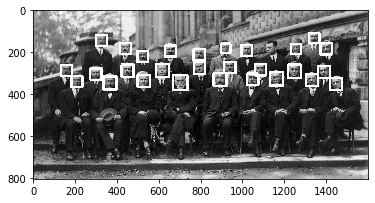

In [115]:
plt.imshow(adj_detect_face(solvay), cmap='gray')

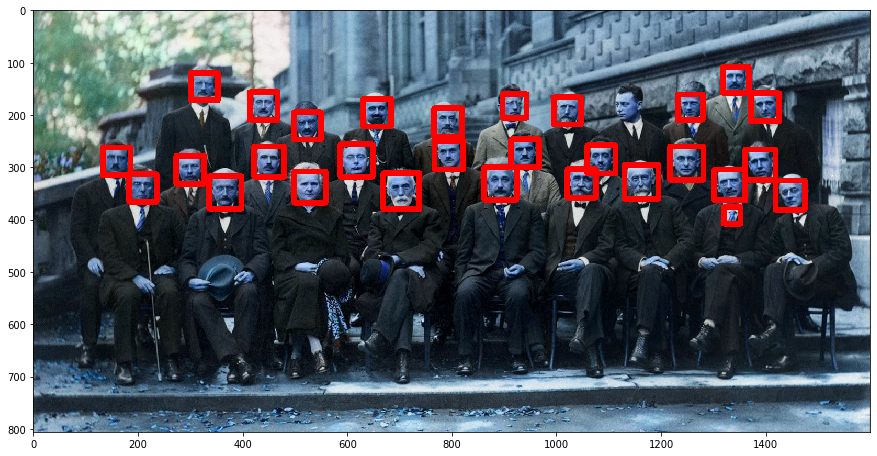

In [120]:
show_image(adj_detect_face(solvay))

In [121]:
eye_cascade = cv2.CascadeClassifier(r'C:\Users\cvenkatanagasatya\Pictures\Open CV\Computer-Vision-with-Python\DATA\haarcascades\haarcascade_eye.xml')

In [7]:
def adj_detect_eyes(img):
    eye_img = img.copy()
    eye_rect = eye_cascade.detectMultiScale(eye_img,scaleFactor=1.2,minNeighbors=5)
    for (x,y,w,h) in eye_rect:
        cv2.rectangle(eye_img,(x,y),(x+w,y+h), (255,0,0), 10)
    return eye_img

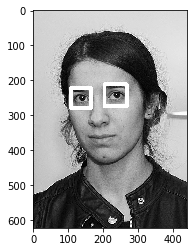

In [130]:
plt.imshow(adj_detect_eyes(nadia), cmap='gray')

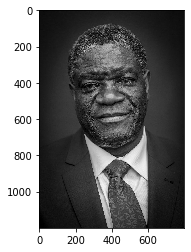

In [132]:
plt.imshow(adj_detect_eyes(denis), cmap='gray')

In [12]:
#video 

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    
    face = detect_face(frame)
    cv2.imshow("face", face)
    
    if cv2.waitKey(1) & 0xFF==27:
        break
        
cap.release()
cv2.destroyAllWindows()